In [1]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob


from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [2]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [34]:
#main_path = "../input/chest-xray-pneumonia/chest_xray/"
main_path = "C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")


for i in range(len(train_normal)):
    train_normal[i]=train_normal[i].replace("\\","/")
for i in range(len(train_pneumonia)):
    train_pneumonia[i]=train_pneumonia[i].replace("\\","/")

for i in range(len(test_normal)):
    test_normal[i]=test_normal[i].replace("\\","/")
for i in range(len(test_pneumonia)):
    test_pneumonia[i]=test_pneumonia[i].replace("\\","/")


In [35]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [36]:
df_train


,class,image
0,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/IM-0115-0001.jpeg
1,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/IM-0117-0001.jpeg
2,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/IM-0119-0001.jpeg
3,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/IM-0122-0001.jpeg
4,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/IM-0125-0001.jpeg
...,...,...
5211,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person99_virus_183...
5212,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person9_bacteria_3...
5213,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person9_bacteria_3...
5214,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person9_bacteria_4...


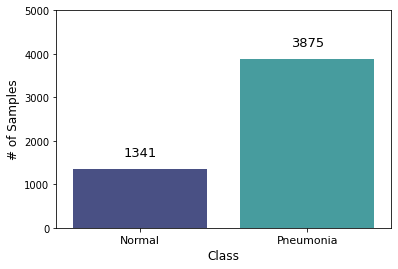

In [37]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

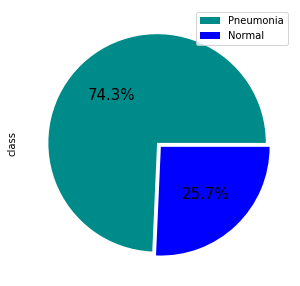

In [38]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

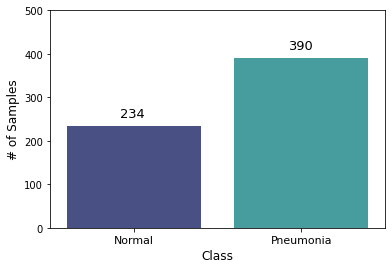

In [40]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

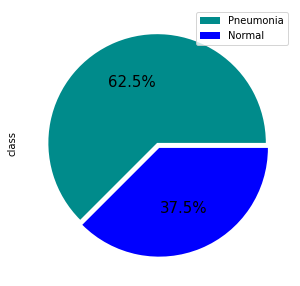

In [41]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Train Set - Normal


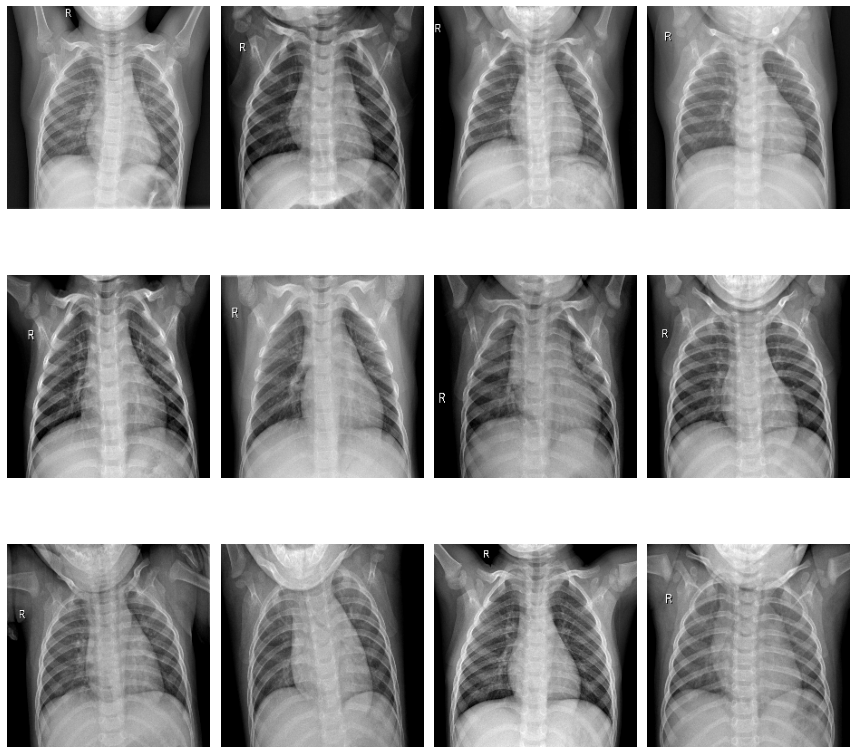

In [43]:
print('Train Set - Normal')
import cv2
plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


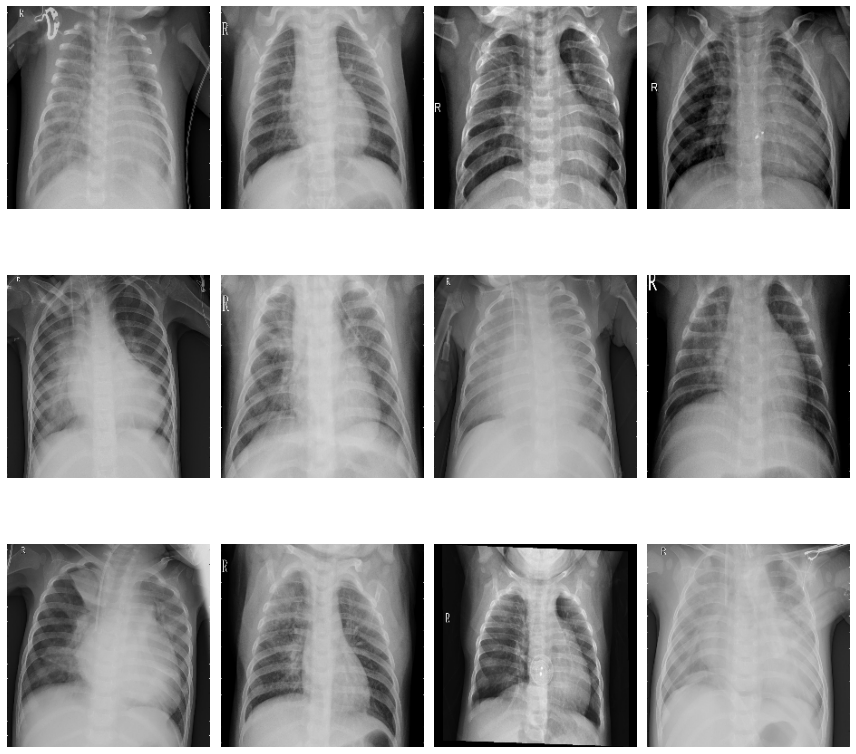

In [44]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()


In [45]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [46]:
train_df

,class,image
99,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/IM-0273-0001.jpeg
1284,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/NORMAL2-IM-1306-0001....
5142,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person963_virus_16...
1365,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person1016_bacteri...
2649,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person1604_virus_2...
...,...,...
4481,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person611_bacteria...
2404,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person1491_bacteri...
705,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/NORMAL2-IM-0523-0001....
3732,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person420_bacteria...


In [47]:
val_df


,class,image
1977,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person1318_bacteri...
2328,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person1463_virus_2...
4344,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person574_bacteria...
956,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/NORMAL2-IM-0904-0001....
3753,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person426_bacteria...
...,...,...
3339,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person321_bacteria...
1368,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person1018_bacteri...
1585,Pneumonia,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/PNEUMONIA/person1139_bacteri...
1128,Normal,C:/Users/risha/Desktop/vit/SEM 4/AI/pythonProject2/chest_xray/train/NORMAL/NORMAL2-IM-1124-0001....


In [48]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [49]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model


234561536/234545216 [==============================] - 423s 2us/step


In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='categorical_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                         metrics='accuracy')

model_pretrained.summary()

In [69]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_binary_accuracy',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

In [70]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 7,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/7
130/130 [==============================] - 2297s 18s/step - loss: 0.1308 - binary_accuracy: 0.9530 - val_loss: 0.1296 - val_binary_accuracy: 0.9473 - lr: 5.0000e-
Epoch 2/7
130/130 [==============================] - 2636s 20s/step - loss: 0.1270 - binary_accuracy: 0.9525 - val_loss: 0.1011 - val_binary_accuracy: 0.9607 - lr: 5.0000e-0
Epoch 3/7
130/130 [==============================] - 2831s 22s/step - loss: 0.1196 - binary_accuracy: 0.9549 - val_loss: 0.1059 - val_binary_accuracy: 0.9598 - lr: 5.0000e-
Epoch 4/7
130/130 [==============================] - 2777s 21s/step - loss: 0.1188 - binary_accuracy: 0.9545 - val_loss: 0.0878 - val_binary_accuracy: 0.9646 - lr: 5.0000e-
Epoch 5/7
130/130 [==============================] - 2434s 19s/step - loss: 0.1098 - binary_accuracy: 0.9600 - val_loss: 0.0829 - val_binary_accuracy: 0.9674 - lr: 5.0000e-0
Epoch 6/7
130/130 [==============================] - 2283s 18s/step - loss: 0.1062 - binary_accuracy: 0.9640 - val_loss: 0.0800 - val

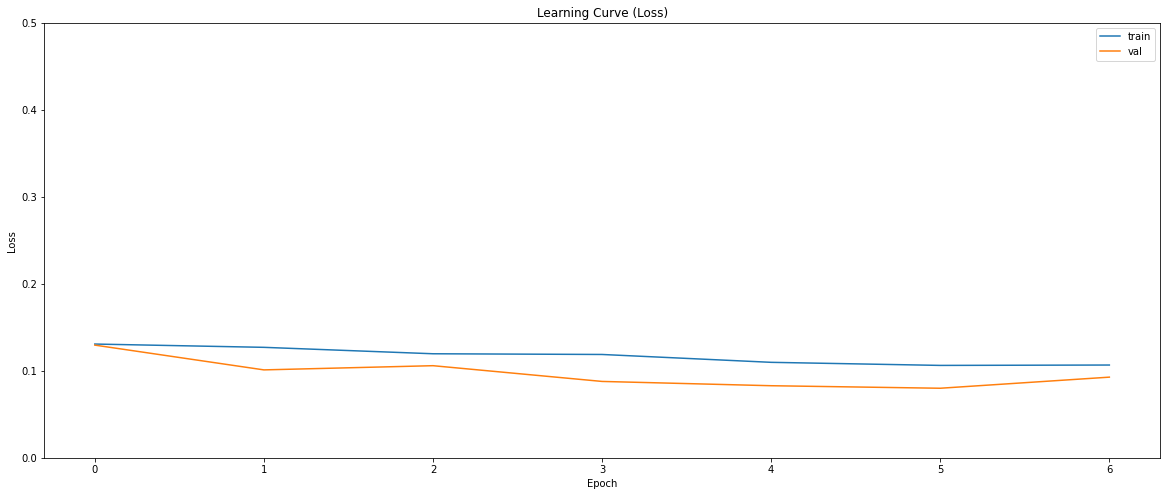

In [71]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

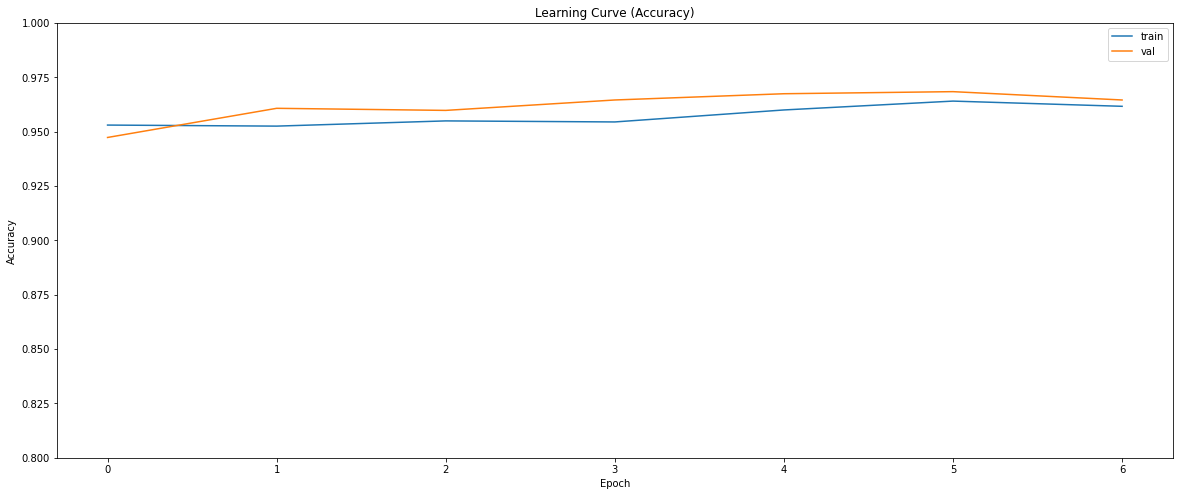

In [72]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()


In [73]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.09272785484790802
Val accuracy: 0.9645593762397766


In [74]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.43231651186943054
Test accuracy: 0.8349359035491943


In [75]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [76]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [77]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [78]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.8349358974358975


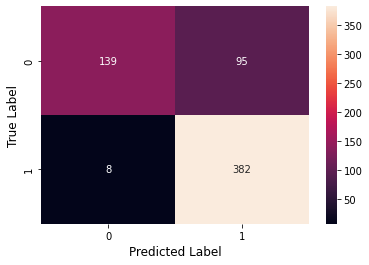

In [79]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()


In [80]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       234
           1       0.80      0.98      0.88       390

    accuracy                           0.83       624
   macro avg       0.87      0.79      0.81       624
weighted avg       0.86      0.83      0.82       624



ROC_AUC:  0.9427788735481043


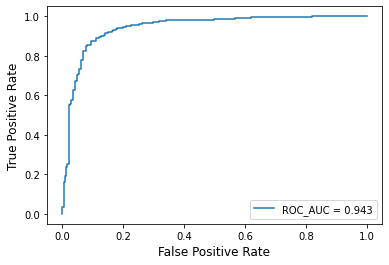

In [81]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [82]:
model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             